<a href="https://colab.research.google.com/github/P-Karthikeya512/Heart-Disease/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc

Data Collection and Processing

In [22]:
# Load the CSV data into a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [23]:
# Display the first 5 rows of the dataset
print("First 5 rows:")
print(heart_data.head())

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [24]:
# Display the last 5 rows of the dataset
print("\nLast 5 rows:")
print(heart_data.tail())


Last 5 rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [25]:
# Display the shape of the dataset
print("\nDataset shape:", heart_data.shape)



Dataset shape: (1025, 14)


In [26]:
# Show dataset info
print("\nDataset information:")
heart_data.info()



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [27]:
# Check for missing values
print("\nMissing values in each column:")
print(heart_data.isnull().sum())


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [28]:
# Display statistical measures about the data
print("\nDataset statistical description:")
print(heart_data.describe())



Dataset statistical description:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.

In [29]:
# Distribution of the target variable
print("\nTarget variable distribution:")
print(heart_data['target'].value_counts())


Target variable distribution:
target
1    526
0    499
Name: count, dtype: int64


1 --> Defective Heart

0 --> Healthy Heart

## EDA (Exploratory Data Analysis)

# 1. Target variable distribution

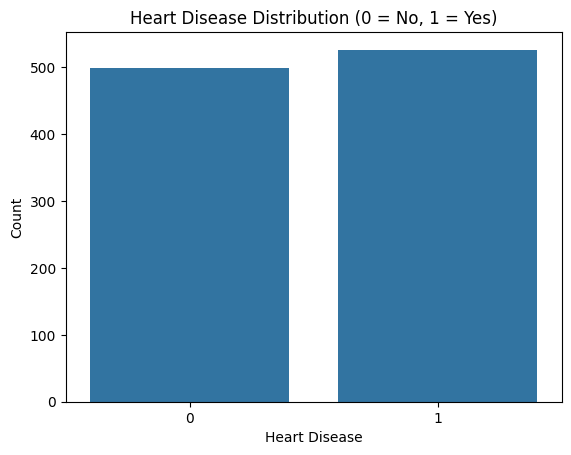

In [30]:
sns.countplot(x='target', data=heart_data)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


# 2. Age distribution

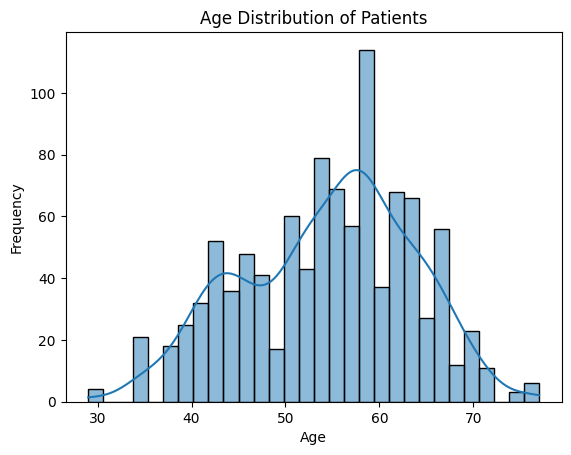

In [31]:
sns.histplot(heart_data['age'], kde=True, bins=30)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 3. Correlation heatmap

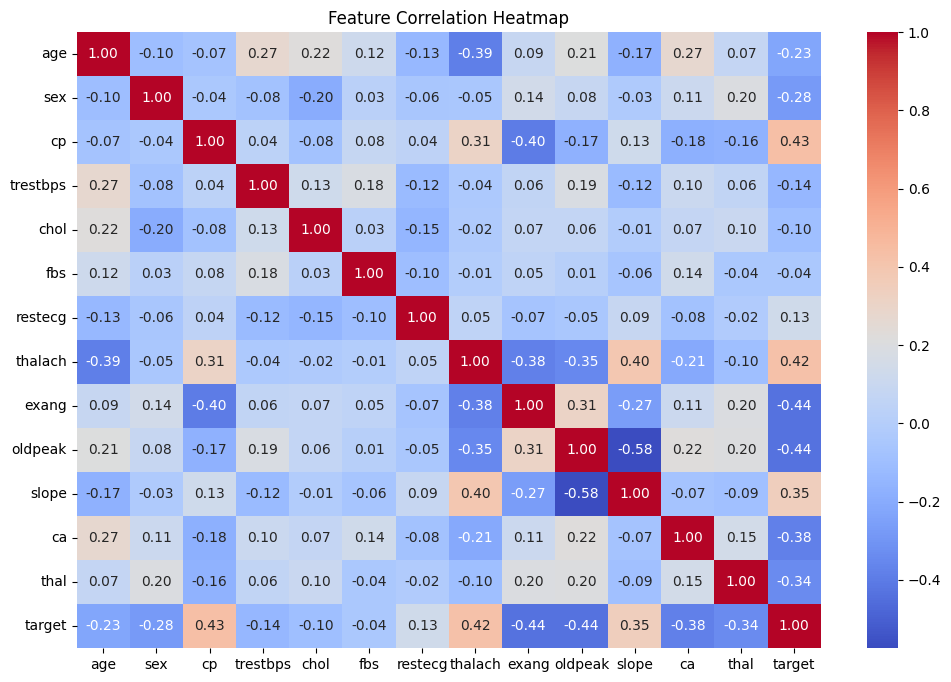

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Chest pain type vs heart disease

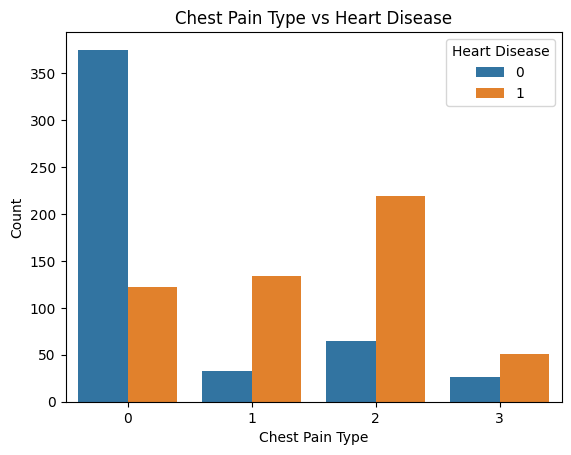

In [33]:
sns.countplot(x='cp', hue='target', data=heart_data)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()

# 5. Boxplot - Cholesterol vs Target

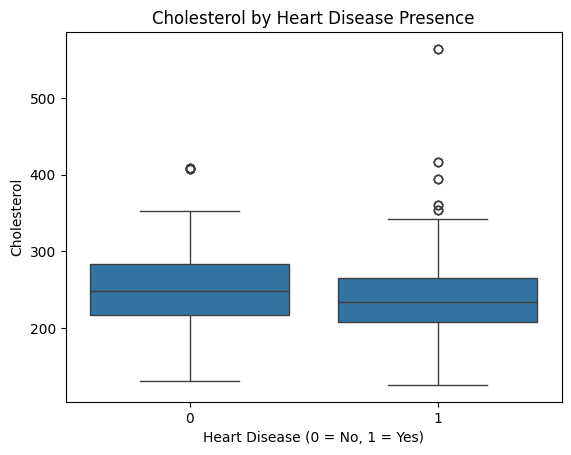

In [34]:
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title("Cholesterol by Heart Disease Presence")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()

Splitting the Features and Target

In [36]:
# Split the data into features and target
X = heart_data.drop(columns='target')
Y = heart_data['target']

In [37]:
print("\nFeatures (first 5 rows):")
print(X.head())



Features (first 5 rows):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


In [38]:
print("\nTarget (first 5 rows):")
print(Y.head())


Target (first 5 rows):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Splitting the Data into Training data & Test Data

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [40]:
print("\nOriginal data shape:", X.shape)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Original data shape: (1025, 13)
Training set shape: (820, 13)
Test set shape: (205, 13)


Model Training

Logistic Regression

In [41]:
# Initialize the scaler and scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Initialize and train the Logistic Regression model (with max iterations increased)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score

In [43]:
# Accuracy on test data
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [44]:
print("Accuracy on Test data:", test_data_accuracy)

Accuracy on Test data: 0.8048780487804879


#  ROC Curve

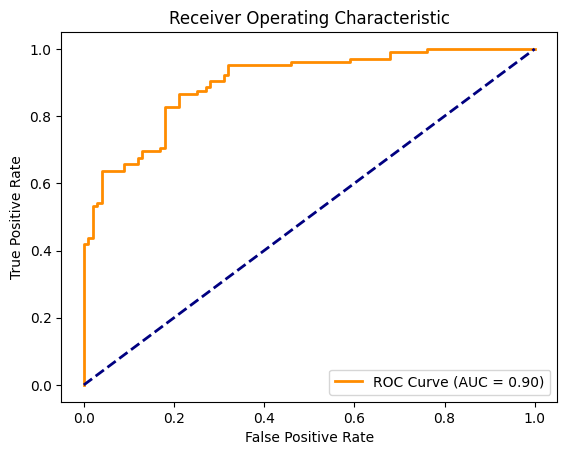

In [45]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

Building a Predictive System

In [46]:
# Define input data for a new prediction (make sure the order corresponds to the training feature columns)
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Convert the input data to a numpy array and reshape it for one instance
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Convert the numpy array into a DataFrame with the same columns as used during training
input_data_df = pd.DataFrame(input_data_reshaped, columns=X_train.columns)

# Scale the input data using the same scaler fitted on training data
input_data_scaled = scaler.transform(input_data_df)

# Make a prediction for the new input data
prediction = model.predict(input_data_scaled)
print("\nPrediction value:", prediction)

if prediction[0] == 0:
    print('The Person does not have Heart Disease')
else:
    print('The Person has Heart Disease')



Prediction value: [0]
The Person does not have Heart Disease
